<a href="https://colab.research.google.com/github/Redellareffah/Redellareffa/blob/main/Case_Study_RevoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RevoU Task

In [1]:
pip install pandas matplotlib seaborn gspread oauth2client

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load data from Google Sheets as CSV
sheet_url = "https://docs.google.com/spreadsheets/d/1FrSzJLJ-VgPI0WVR1L1D3rmSLztwh1Tx2a_NcJA2S60/export?format=csv&id=1FrSzJLJ-VgPI0WVR1L1D3rmSLztwh1Tx2a_NcJA2S60&gid=1666191194"
df = pd.read_csv(sheet_url)

In [11]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


# 1. Which product lines have the highest and lowest sales? Create a chart that is representable.

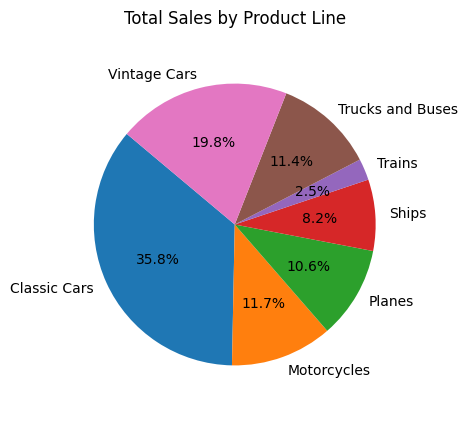

In [35]:
# Hitung kolom SALES
df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Kelompokkan berdasarkan PRODUCTLINE
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum()

# Plot pie chart
plt.figure(figsize=(4, 5))
plt.pie(sales_by_productline, labels=sales_by_productline.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Product Line')
plt.axis('equal')
plt.show()

# 2. Show sales performance over time, is there any pattern?

In [19]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
monthly_sales = df.resample('M', on='ORDERDATE')['SALES'].sum()

/tmp/ipython-input-19-416375768.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='ORDERDATE')['SALES'].sum()


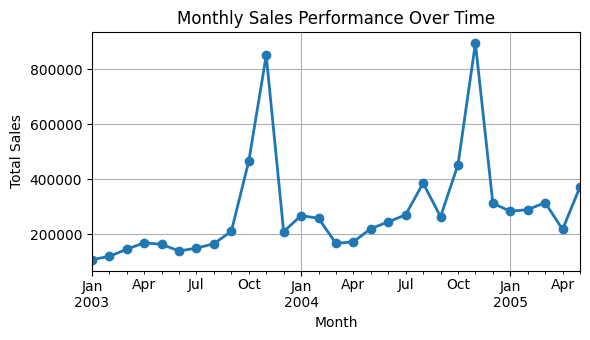

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3.5))
monthly_sales.plot(marker='o', linewidth=2)
plt.title('Monthly Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. How does deal size (small, medium, large) correlate with total sales? What is the percentage of contribution for each type of deal?

In [29]:
df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum()
percentage_by_dealsize = (sales_by_dealsize / sales_by_dealsize.sum()) * 100
result = pd.DataFrame({
    'Total Sales': sales_by_dealsize,
    'Percentage (%)': percentage_by_dealsize
}).sort_values(by='Total Sales', ascending=False)

print(result)

          Total Sales  Percentage (%)
DEALSIZE                             
Medium     4961736.68       59.832670
Small      2592193.44       31.258784
Large       738757.91        8.908546


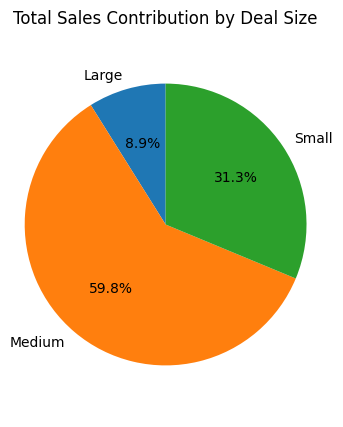

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
plt.pie(sales_by_dealsize, labels=sales_by_dealsize.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales Contribution by Deal Size')
plt.axis('equal')
plt.show()

In [40]:
pip install scipy pandas

In [42]:
import pandas as pd
from scipy.stats import spearmanr

# Load data from Google Sheets as CSV
sheet_url = "https://docs.google.com/spreadsheets/d/1FrSzJLJ-VgPI0WVR1L1D3rmSLztwh1Tx2a_NcJA2S60/export?format=csv&id=1FrSzJLJ-VgPI0WVR1L1D3rmSLztwh1Tx2a_NcJA2S60&gid=1666191194"
df = pd.read_csv(sheet_url)

df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df['DealSizeCode'] = df['DEALSIZE'].map({'Small': 1, 'Medium': 2, 'Large': 3})
spearman_corr, _ = spearmanr(df['DealSizeCode'], df['SALES'])
print(f"Spearman Correlation Coefficient: {spearman_corr}")

Spearman Correlation Coefficient: 0.8111051243685536


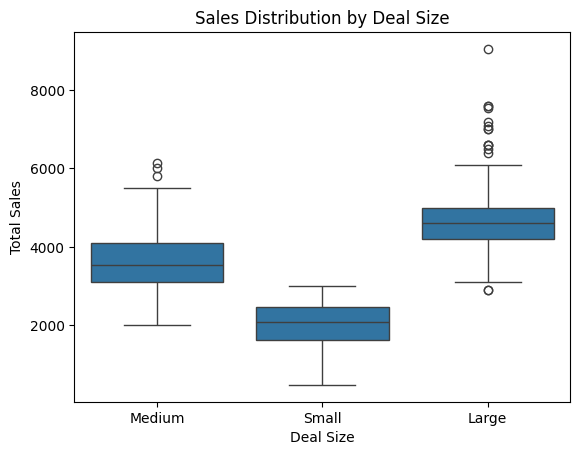

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Deal Size')
plt.show()